# Clustering using CustomKMeans Class

In [1]:
%load_ext autoreload
%autoreload 2

# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from my_package.custom_kmeans import CustomKMeans

In [2]:
df = pd.read_csv("../data/cleaned/cleaned_data.csv")

In [3]:
# 1000 Random Entries from Price and Product_ID
sampled_prices = df['price'].sample(n=1000, replace=False).reset_index(drop=True)
sampled_product_ids = df['product_id'].sample(n=1000, replace=False).reset_index(drop=True)

# Create a a Sampled Dataframe
sampled_data = pd.DataFrame({
    'price': sampled_prices,
    'product_id': sampled_product_ids
})

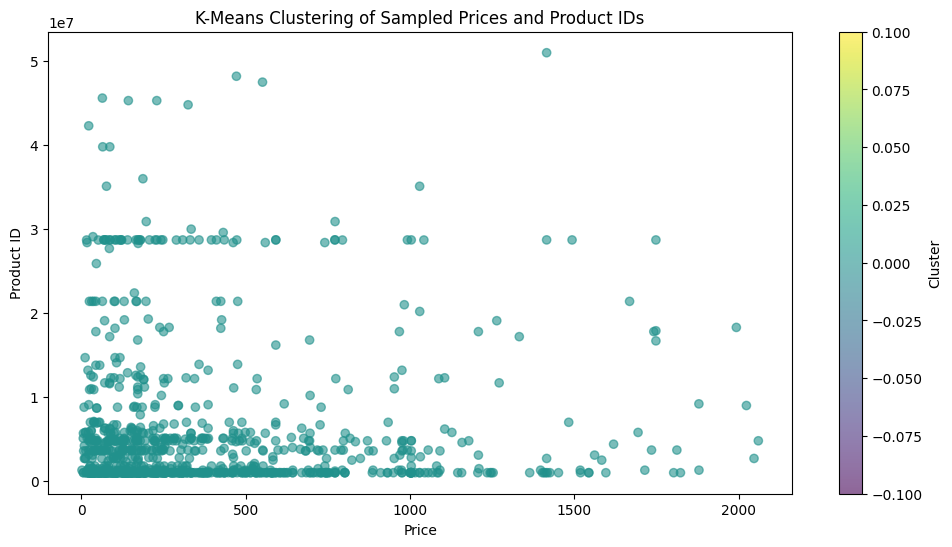

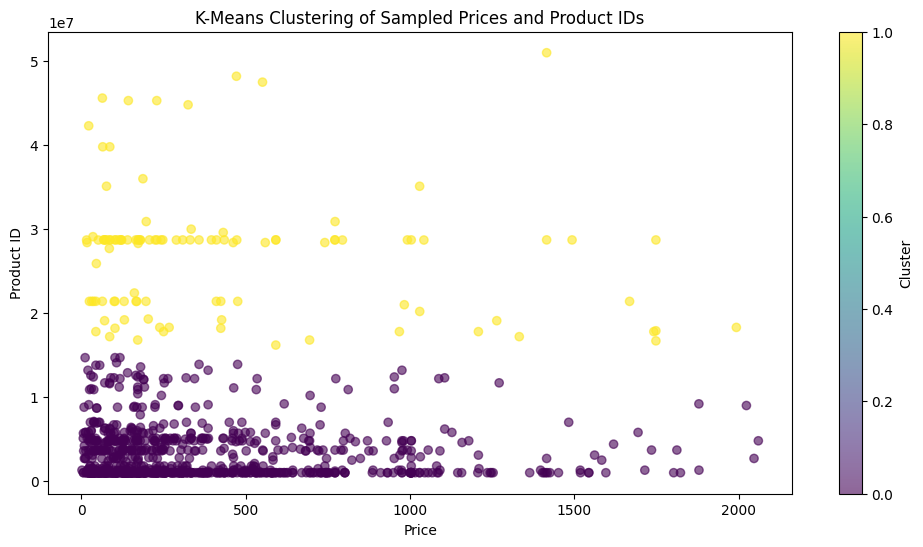

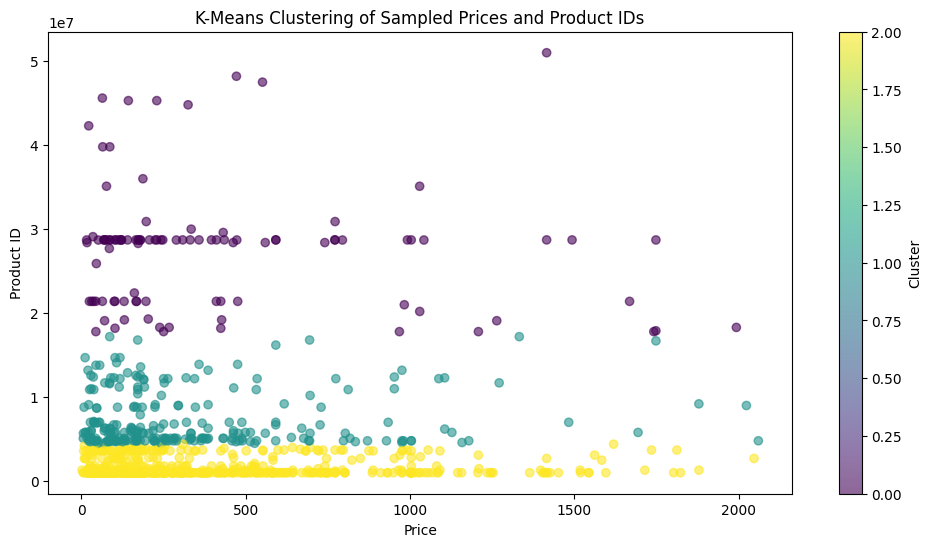

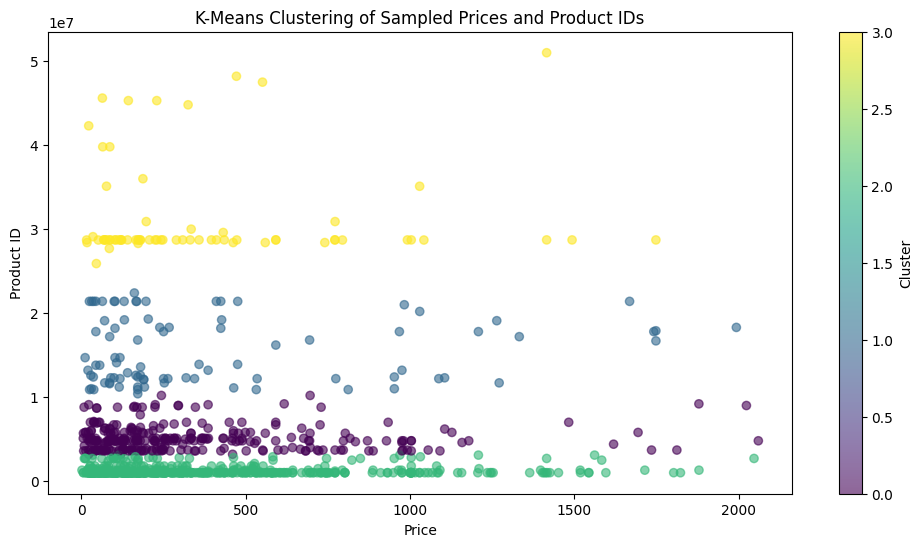

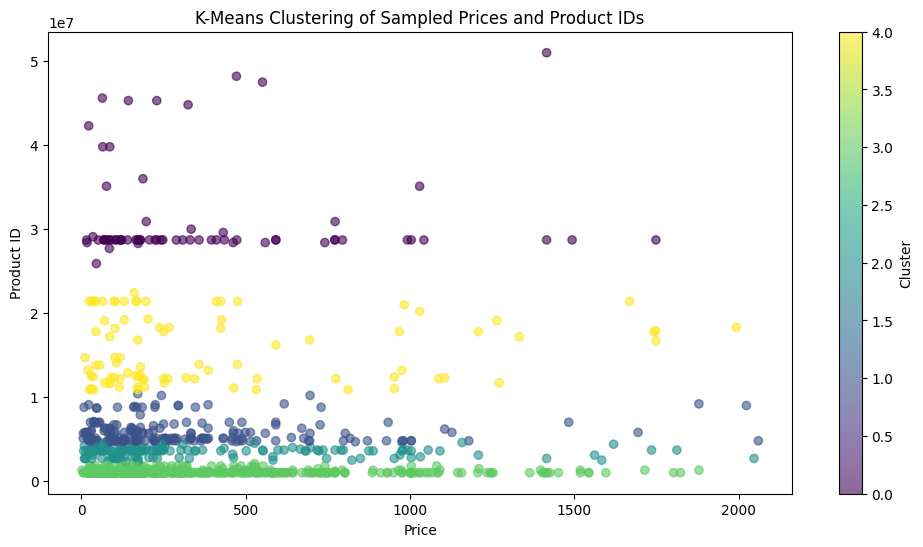

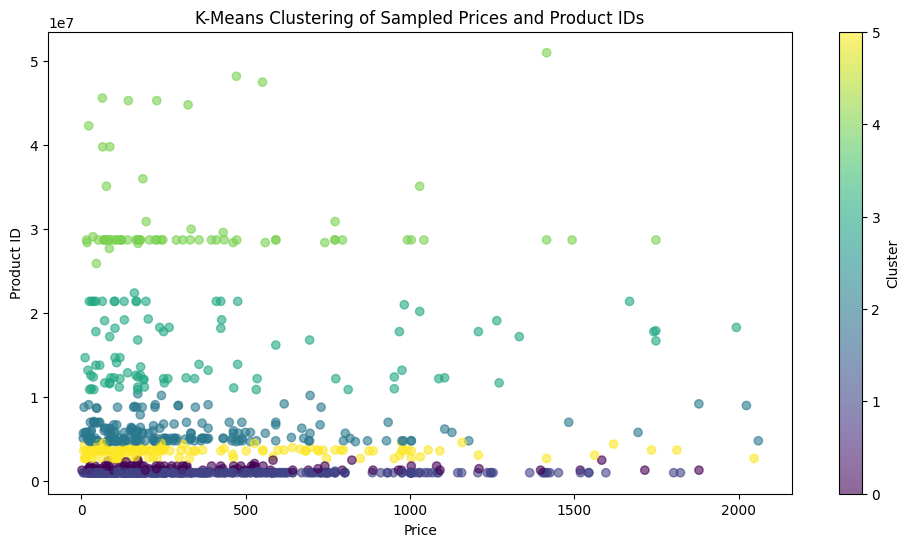

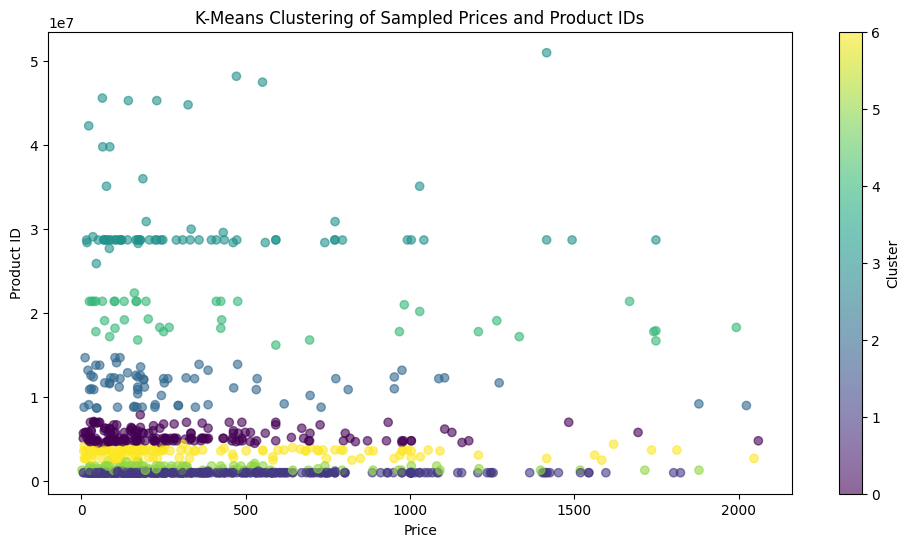

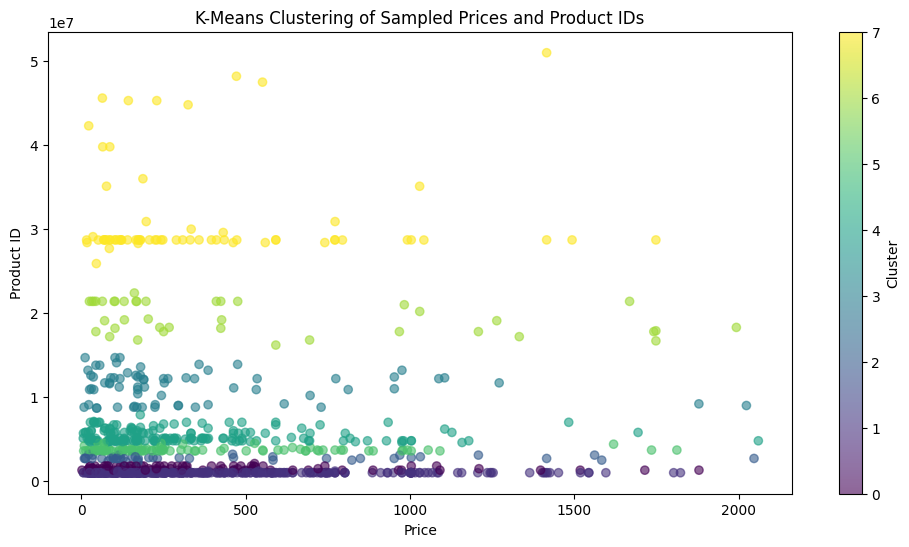

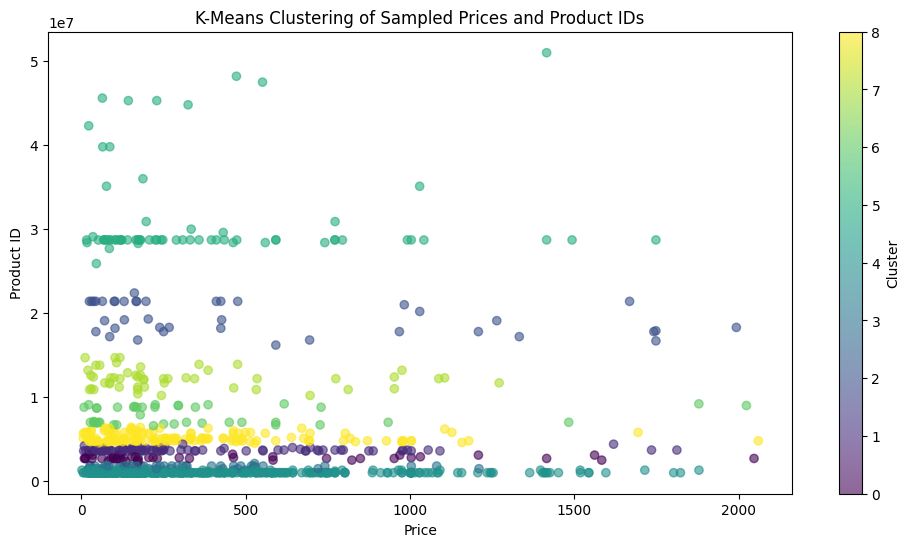

In [4]:
#### Custom KMeans (c_kmeans) implementation


def plot_clusters(sampled_data, kmeans):
    plt.figure(figsize=(12, 6))
    plt.scatter(sampled_data['price'], sampled_data['product_id'], c=sampled_data['cluster'], cmap='viridis', alpha=0.6)
    plt.xlabel('Price')
    plt.ylabel('Product ID')
    plt.title('K-Means Clustering of Sampled Prices and Product IDs')
    plt.colorbar(label='Cluster')
    plt.show()



for i in range(1,10):
    #Use the KMeans on the sampled data frame we just made (x1 = price, x2 = product_id)
    kmeans = CustomKMeans(k=i)

    #Finds best centroids
    kmeans.fit(sampled_data)

    #Predict what data is best around said clusters
    sampled_data['cluster'] = kmeans.predict(sampled_data)
    
    plot_clusters(sampled_data, kmeans)

# Clustering using SkLearn 

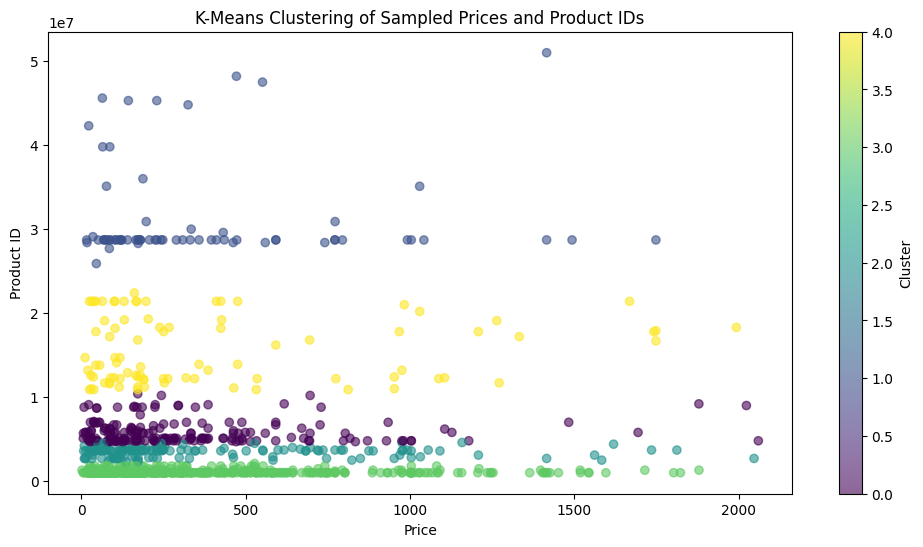

Now doing sklearn version


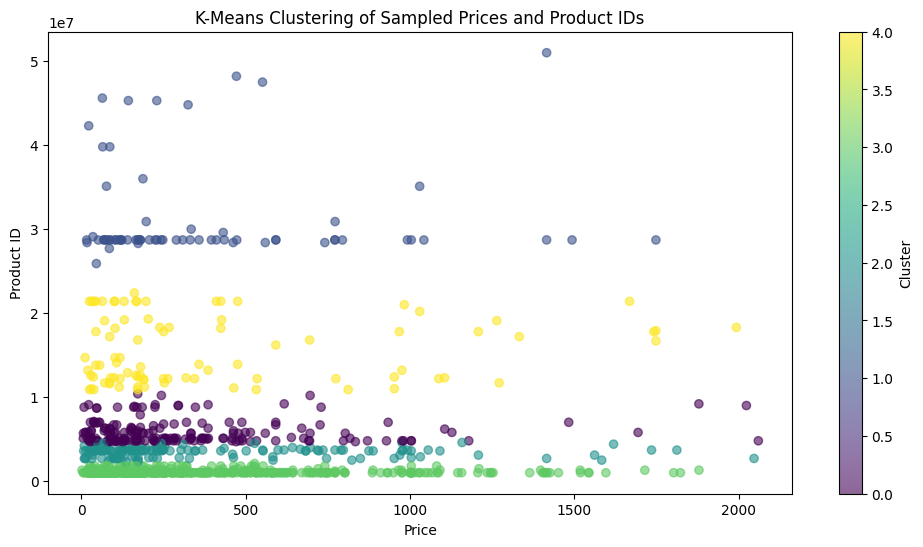

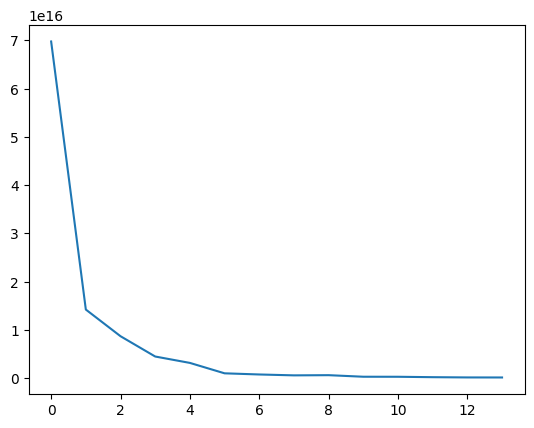

In [5]:
#Compare it to the SkLearn version, lets use k = 5

# Run custom k-means over the clusters dataset with 5 clusters
#Use the KMeans on the sampled data frame we just made (x1 = price, x2 = product_id)
kmeans = CustomKMeans(k=5)

#Finds best centroids
kmeans.fit(sampled_data)

#Predict what data is best around said clusters
sampled_data['cluster'] = kmeans.predict(sampled_data)
    
plot_clusters(sampled_data, kmeans)

print("Now doing sklearn version")
# Run k-means over the clusters dataset with 5 clusters
km = KMeans(n_clusters=5)
clusters = km.fit(sampled_data)
km.cluster_centers_
#labels = (km.labels_) # Array of all labels
plot_clusters(sampled_data, km)

# Create a line plot showing the inertia (SSE) for each n_clusters value
inertia = []


for (i) in range(1,15):
  km = KMeans(n_clusters=i)
  clusters = km.fit(sampled_data)
  inertia.append(km.inertia_)

plt.plot(inertia)
plt.show()
